In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 14,8


In [26]:
df = pd.read_excel("./dados/Base WDI - Séries listadas no programa - 1991 a 2019  v01dez2020.xlsx",sheet_name = "Data" )

In [27]:
df.head(2)

,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,..,..,..,..,..,..,...,23.7437,24.3909,22.8107,22.137,20.6343,21.0811,20.4665,20.2528,21.1344,..
1,Afghanistan,AFG,Chemicals (% of value added in manufacturing),NV.MNF.CHEM.ZS.UN,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [28]:
df_alemanha = df.loc[df["Country Name"] == "Germany"]
df_alemanha = df_alemanha.drop(["Country Name","Country Code","Series Code"], axis=1)
df_alemanha = df_alemanha.set_index("Series Name", drop=True)

In [29]:
df_alemanha = df_alemanha.T

In [37]:
print("\nColunas no dataset\n")
[print(coluna) for coluna in df_alemanha.columns]
print("\n")


Colunas no dataset

Agriculture, forestry, and fishing, value added (% of GDP)
Chemicals (% of value added in manufacturing)
Central government debt, total (% of GDP)
Deposit interest rate (%)
Expense (% of GDP)
Food, beverages and tobacco (% of value added in manufacturing)
GDP growth (annual %)
GNI, PPP (current international $)
GNI per capita, PPP (current international $)
GDP per capita growth (annual %)
GDP per person employed (constant 2017 PPP $)
Industry (including construction), value added (% of GDP)
Inflation, consumer prices (annual %)
Lending interest rate (%)
Manufacturing, value added (% of GDP)
Machinery and transport equipment (% of value added in manufacturing)
Net lending (+) / net borrowing (-) (% of GDP)
Other manufacturing (% of value added in manufacturing)
Population, female
Population, female (% of total population)
Population, male
Population, male (% of total population)
Population, total
Revenue, excluding grants (% of GDP)
Risk premium on lending (lending 

In [103]:
# Selecionando apenas o crescimento real do PIB no período de interesse

df_pib = df_alemanha["GDP growth (annual %)"][-12::][:-1]

In [104]:
anos = [int(ano[:4]) for ano in list(df_pib.keys())]

df_pib.keys=anos

In [129]:
df_pib = pd.DataFrame(df_pib, dtype=float)

df_pib.index = anos

In [130]:
df_pib["GDP growth (annual %)"]

2009   -5.697152
2010    4.178969
2011    3.924133
2012    0.419551
2013    0.428243
2014    2.225689
2015    1.739750
2016    2.230000
2017    2.465030
2018    1.527446
2019    0.564175
Name: GDP growth (annual %), dtype: float64

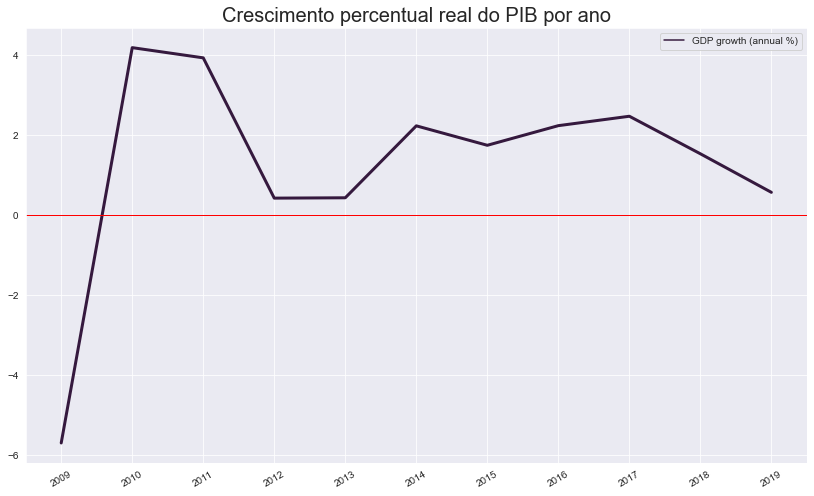

In [145]:
sns.set_style("darkgrid")
sns.set_palette("rocket")

plt.xticks(anos,rotation=30)

graph = sns.lineplot(data=df_pib, linewidth=3)

graph.axhline(0, color = "r",linewidth=1)

graph.set_title('Crescimento percentual real do PIB por ano', fontsize=20)

plt.savefig('cresc_pib_real.png')

plt.show()